In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install requests beautifulsoup4 nltk wordcloud
!pip install konlpy


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  # word_tokenize를 추가
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
nltk.download('punkt')
from PIL import Image
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def crawl_naver_news(query, num_pages=5):
    base_url = f"https://news.google.com/search?q={query}&hl=ko-KR&gl=KR&ceid=KR:ko"
    all_results = []  # 모든 검색 결과를 저장할 리스트
    for page in range(1, num_pages + 1):
        params = {
            "where": "news",
            "query": query,
            "start": (page - 1) * 10 + 1,  # 페이지 번호에 따라 start 값 변경
        }

        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }
        response = requests.get(base_url, params=params, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            news_articles = soup.select(".news_area")

            news_articles = soup.select(".xrnccd")
            for article in news_articles:
                title = article.find("h3").text
                link = article.find("a", href=True)["href"]
                print(f"제목: {title}")
                print(f"링크: {link}")
                print("\n")
                result = {
                    "title": title,
                    "link": link
                }
                all_results.append(result)
        else:
            print("HTTP Error:", response.status_code)
        return all_results

In [ ]:
def extract_and_clean_text(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        article_body = soup.select_one(".article-body")
        if article_body:
            text = article_body.get_text()
            return text
        else:
            print(f"No article body found for URL: {url}")
    else:
        print(f"Failed to fetch URL: {url}")
    return None

In [ ]:
def create_wordcloud(text):
    # NLTK를 사용하여 텍스트 정제 (불용어 제거 등)
    okt = Okt()
    nouns = okt.nouns(text) # 명사만 추출
    words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
    # 단어 빈도 계산
    word_freq = nltk.FreqDist(words)

    # 워드클라우드 생성
    wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


제목: 인천시, 전동킥보드 안전사고 예방을 위한 종합계획 수립
링크: ./articles/CBMiQmh0dHBzOi8vd3d3LmRuZXdzLmNvLmtyL3VodG1sL3ZpZXcuanNwP2lkeG5vPTIwMjMxMDA1MTAzNzUwODc4MDUxMdIBAA?hl=ko&gl=KR&ceid=KR%3Ako


제목: 4년 간 전동킥보드 사고 3배 급증... 인천시, 대책 수립 나서
링크: ./articles/CBMiO2h0dHBzOi8vd3d3LmluY2hlb25pbi5jb20vbmV3cy9hcnRpY2xlVmlldy5odG1sP2lkeG5vPTk3NzQw0gEA?hl=ko&gl=KR&ceid=KR%3Ako


제목: “전동킥보드 불법주차 간편하게 신고하세요”···울산시,카카오톡 신고방 개설
링크: ./articles/CBMiLGh0dHBzOi8vbS5raGFuLmNvLmtyL2FydGljbGUvMjAyMzEwMDUwODE5MDAx0gE8aHR0cHM6Ly9tLmtoYW4uY28ua3IvbG9jYWwvVWxzYW4vYXJ0aWNsZS8yMDIzMTAwNTA4MTkwMDEvYW1w?hl=ko&gl=KR&ceid=KR%3Ako


제목: 티머니GO, 국내 모빌리티 플랫폼 중 PM 운영 대수 1위 등극
링크: ./articles/CBMiMGh0dHBzOi8vd3d3LnVwaW5ld3Mua3IvbmV3c1ZpZXcvMTA2NTU5MzkyMjc3MjQ5OdIBKWh0dHBzOi8vbS51cGluZXdzLmtyL2FtcC8xMDY1NTkzOTIyNzcyNDk5?hl=ko&gl=KR&ceid=KR%3Ako


제목: 평택시, '전동킥보드 주차장' 공짜라서 '땡큐'
링크: ./articles/CBMiNmh0dHBzOi8vd3d3LmtnbmV3cy5jby5rci9tb2JpbGUvYXJ0aWNsZS5odG1sP25vPTc2MjI3NtIBAA?hl=ko&gl=KR&ceid=KR%3Ako


제목: 공유 전동킥보드 안전 위협… 시민 '불만' 커져
링크: ./articles/CB

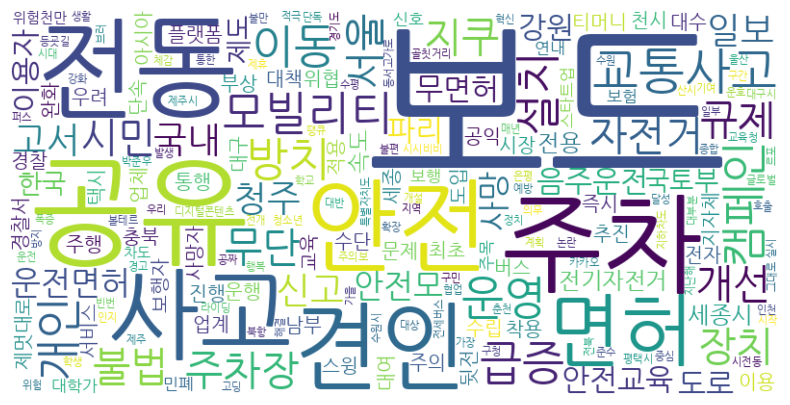

In [ ]:
if __name__ == "__main__":
    query = "전동 킥보드 PM"  # 크롤링할 키워드를 수정하세요.
    search_results = crawl_naver_news(query)

    # 기사 URL에서 텍스트 추출 및 정제 후 워드클라우드 생성
for result in search_results:
    article_text += result['title']
create_wordcloud(article_text)